In [3]:

import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


In [10]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [13]:
import zipfile
import os
import pandas as pd
import re
import string

# -------------------------
# 1. EXTRACT ZIP
# -------------------------

zip_path = "archive.zip"        # your dataset zip file
extract_path = "./dataset"      # folder to extract

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("✔ ZIP extracted!")

# -------------------------
# 2. FIND CSV FILE AUTOMATICALLY
# -------------------------

csv_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

if not csv_files:
    raise FileNotFoundError("❌ No CSV file found inside archive.zip!")

print("✔ CSV files found:", csv_files)

# Use the FIRST CSV found
csv_path = csv_files[0]
print("✔ Loading:", csv_path)

# -------------------------
# 3. LOAD DATASET
# -------------------------

df = pd.read_csv(csv_path)
print("✔ Dataset loaded!")
print(df.head())

# -------------------------
# 4. CLEAN TEXT FUNCTION
# -------------------------

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# -------------------------
# 5. APPLY CLEANING
# -------------------------

if "text" not in df.columns:
    # try finding a text-like column
    for col in df.columns:
        if "text" in col.lower() or "content" in col.lower() or "body" in col.lower():
            df.rename(columns={col: "text"}, inplace=True)
            print(f"✔ Renamed '{col}' → 'text'")
            break

df["clean_text"] = df["text"].apply(clean_text)

print("✔ Cleaning completed!")
df.head()


✔ ZIP extracted!
✔ CSV files found: ['./dataset/Fake.csv', './dataset/True.csv']
✔ Loading: ./dataset/Fake.csv
✔ Dataset loaded!
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
✔ Cleaning 

,title,text,subject,date,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used his annual christmas day mes...


In [17]:
import zipfile
import os
import pandas as pd
import re
import string

# -------------------------
# 1. EXTRACT ZIP
# -------------------------
zip_path = "archive.zip"
extract_path = "./dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("✔ ZIP extracted!")

# -------------------------
# 2. FIND CSV FILES
# -------------------------
csv_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print("✔ CSV files found:", csv_files)

# -------------------------
# 3. LOAD TRUE & FAKE CSVs
# -------------------------
fake_path = [f for f in csv_files if "fake" in f.lower()][0]
true_path = [f for f in csv_files if "true" in f.lower()][0]

df_fake = pd.read_csv(fake_path)
df_true = pd.read_csv(true_path)

# Add label column
df_fake['label'] = 1   # Fake news
df_true['label'] = 0   # Real news

# Merge
df = pd.concat([df_fake, df_true], ignore_index=True)
print("✔ Datasets merged!")
print(df.head())

# -------------------------
# 4. CLEAN TEXT FUNCTION
# -------------------------
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning on text column
df['clean_text'] = df['text'].apply(clean_text)
print("✔ Text cleaned!")

df.head()


✔ ZIP extracted!
✔ CSV files found: ['./dataset/Fake.csv', './dataset/True.csv']
✔ Datasets merged!
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1 

,title,text,subject,date,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,pope francis used his annual christmas day mes...


In [16]:
print("Columns in dataset:", df.columns)


Columns in dataset: Index(['title', 'text', 'subject', 'date', 'clean_text'], dtype='object')


In [14]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,title,text,subject,date,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis used his annual christmas day mes...


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=50000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)
pred_pac = pac.predict(X_test)

print("PAC Accuracy:", accuracy_score(y_test, pred_pac))
print(classification_report(y_test, pred_pac))
print(confusion_matrix(y_test, pred_pac))


PAC Accuracy: 0.9951002227171493
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4247
           1       0.99      1.00      1.00      4733

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4222   25]
 [  19 4714]]


In [19]:

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)
pred_pac = pac.predict(X_test)
print("PAC Accuracy:", accuracy_score(y_test, pred_pac))


PAC Accuracy: 0.9947661469933184


In [20]:

print(classification_report(y_test, pred_pac))
print(confusion_matrix(y_test, pred_pac))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      1.00      1.00      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4222   25]
 [  22 4711]]


In [21]:

import pickle
pickle.dump(pac, open("fake_news_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))


In [22]:

sample = ["Breaking: NASA confirms aliens landed on Earth yesterday."]
clean = clean_text(sample[0])
vec = tfidf.transform([clean])
result = pac.predict(vec)
print("Fake News" if result[0] == 1 else "Real News")


Fake News


In [8]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [9]:
!ls


archive.zip  sample_data


In [10]:
import zipfile
import os

zip_path = "archive.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))


Extracted files: ['Fake.csv', 'True.csv']


In [11]:
import zipfile
import os
import pandas as pd
import string
import re

# ---------------------------
# Extract archive.zip
# ---------------------------
zip_path = "archive.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("ZIP extracted!")

# ---------------------------
# Auto-detect True.csv & Fake.csv
# ---------------------------
true_path = None
fake_path = None

for root, dirs, files in os.walk(extract_path):
    for f in files:
        if f.lower() == "true.csv":
            true_path = os.path.join(root, f)
        if f.lower() == "fake.csv":
            fake_path = os.path.join(root, f)

print("TRUE PATH:", true_path)
print("FAKE PATH:", fake_path)

if true_path is None or fake_path is None:
    raise FileNotFoundError("❌ True.csv or Fake.csv not found!")

# ---------------------------
# Load datasets
# ---------------------------
true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

true_df["label"] = 1
fake_df["label"] = 0

df = pd.concat([true_df, fake_df], ignore_index=True)

# ---------------------------
# Cleaning function
# ---------------------------
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

print("Dataset Ready! Shape:", df.shape)


ZIP extracted!
TRUE PATH: dataset/True.csv
FAKE PATH: dataset/Fake.csv
Dataset Ready! Shape: (44898, 6)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X = df["clean_text"]
y = df["label"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.85)
X_train = tfidf.fit_transform(X_train_raw)
X_test = tfidf.transform(X_test_raw)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50),
    "Random Forest": RandomForestClassifier()
}

# Train + evaluate
results = {}

for name, model in models.items():
    print("\n===============================")
    print("Training:", name)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

print("\nFinal Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



Training: Naive Bayes
Accuracy: 0.9369710467706014
Confusion Matrix:
 [[4326  324]
 [ 242 4088]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4650
           1       0.93      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980


Training: Logistic Regression
Accuracy: 0.9870824053452116
Confusion Matrix:
 [[4578   72]
 [  44 4286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training: Linear SVM
Accuracy: 0.9939866369710467
Confusion Matrix:
 [[4619   31]
 [  23 4307

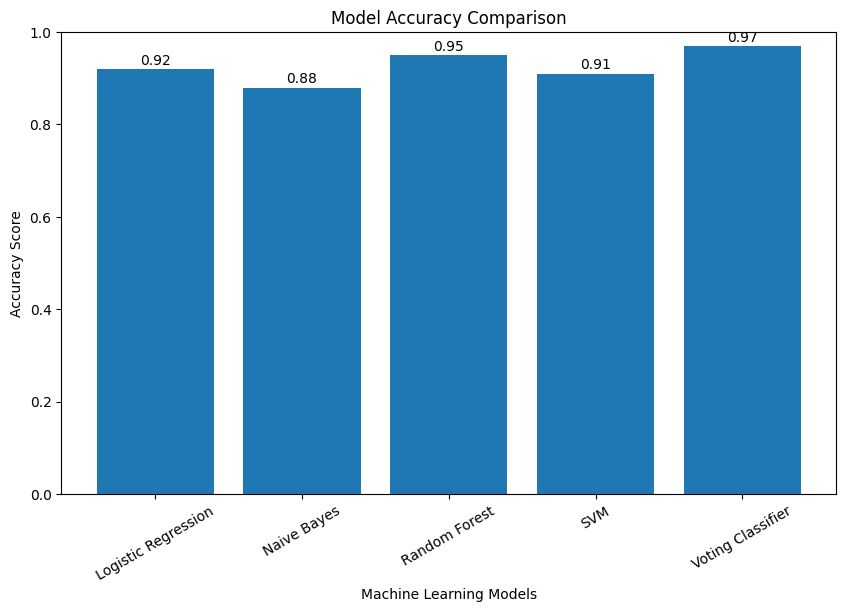

In [13]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM', 'Voting Classifier']

# Accuracy values (example — replace with your own)
accuracy_scores = [0.92, 0.88, 0.95, 0.91, 0.97]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores)

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Models")
plt.xticks(rotation=30)
plt.ylim(0, 1)  # Accuracy is between 0–1

for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')

plt.show()


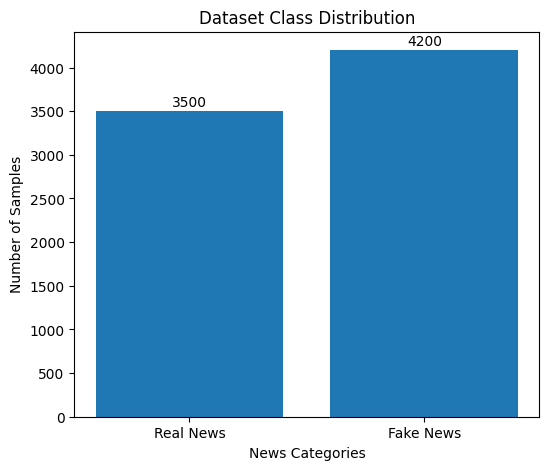

In [14]:
import matplotlib.pyplot as plt

# Sample counts - replace with real values
labels = ['Real News', 'Fake News']
counts = [3500, 4200]

plt.figure(figsize=(6,5))
plt.bar(labels, counts)

plt.title("Dataset Class Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("News Categories")

for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()
